In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

* In this dataset i want to predict CGPA of a student based on different grades in four years
* the dataset contain grades scored by students through out their university tenure in various courde and their CGPA calulated based on their grades
* Total 43 columns and 571 rows are present in this dataset and this dataset problem are related to regression problem because their target variable are continuous 
* in that dataset all 43 columns except CGPA are course code in that case it is not usefull to fill null values if i can fill the null values the grades of specific subjects are fill and the prediction of the data are not accurate


In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [4]:
df.nunique().to_frame('unique values')

,unique values
Seat No.,571
PH-121,13
HS-101,12
CY-105,13
HS-105/12,13
MT-111,13
CS-105,11
CS-106,13
EL-102,13
EE-119,12


In [5]:
df.drop('Seat No.',axis=1,inplace=True)

In [6]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


we can drop the Seat No column because in dataset this is not very usefull to fit the model

# Description of the dataset

In [7]:
df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [8]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


This code gives the statistical information of the numerical data

in this dataset only one numerical column are present and this column is my target variable so i donot remove the skewness or outlyers in that column

# Data Visualization

# Univariate Analysis

In [9]:
df.head(2)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008


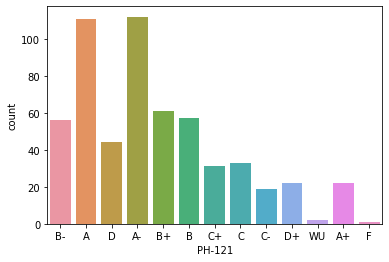

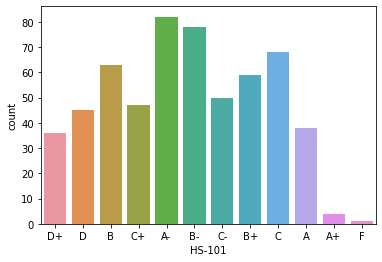

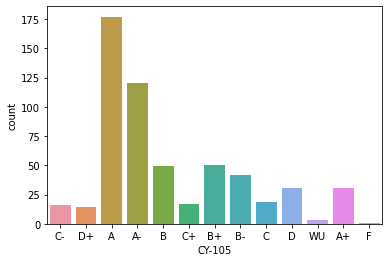

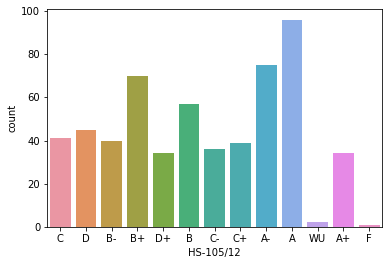

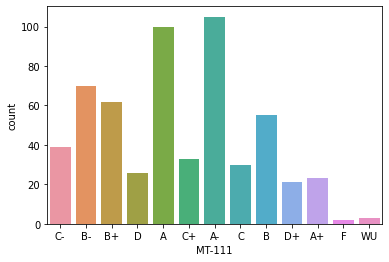

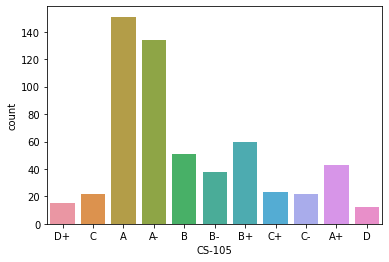

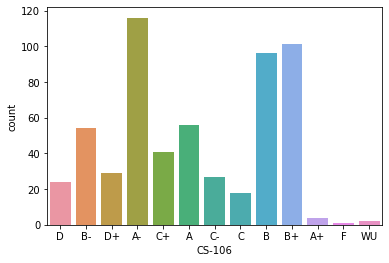

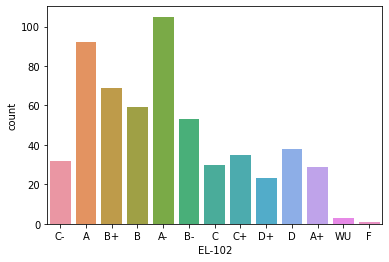

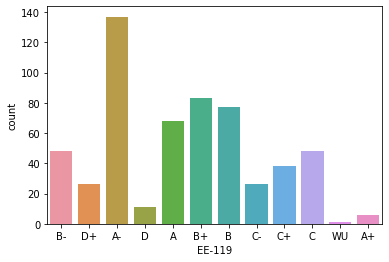

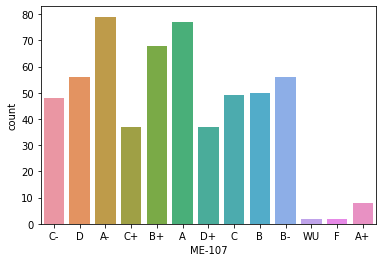

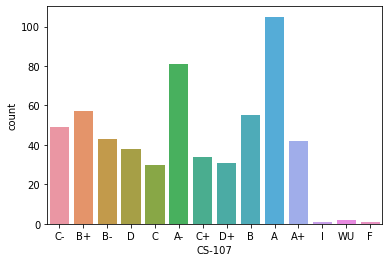

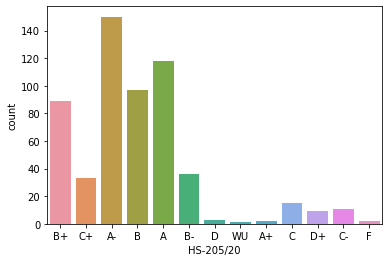

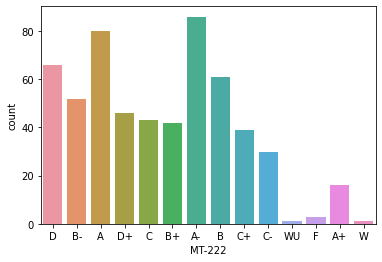

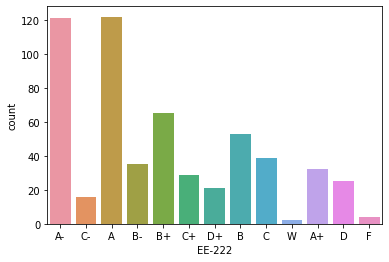

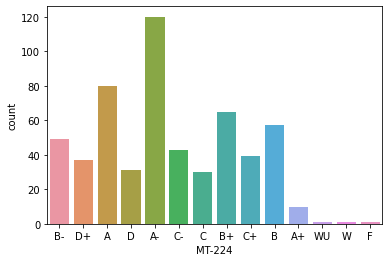

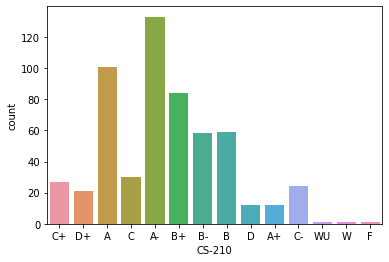

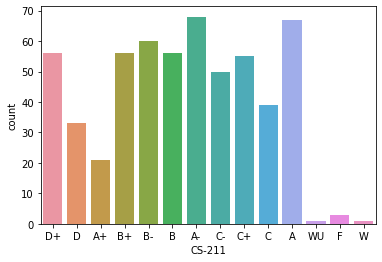

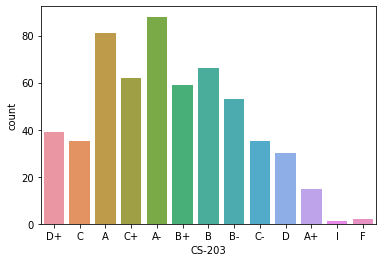

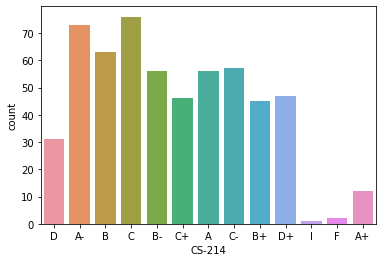

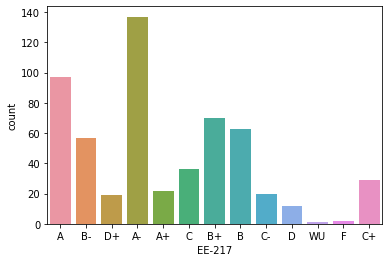

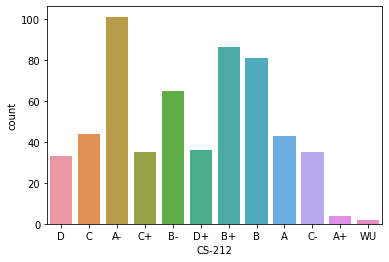

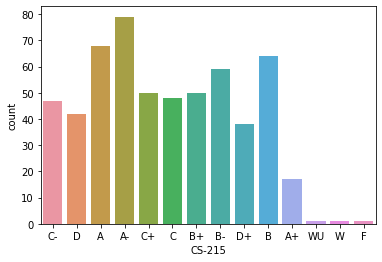

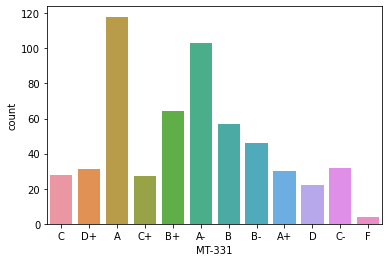

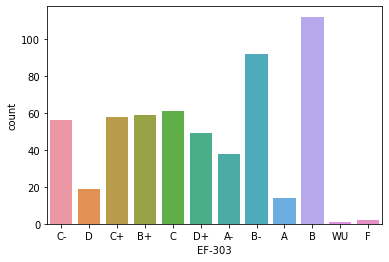

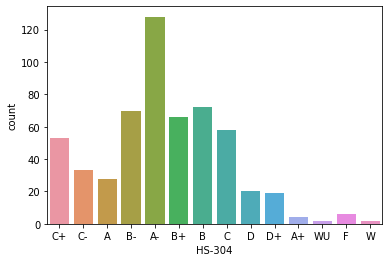

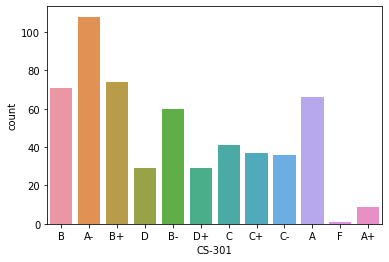

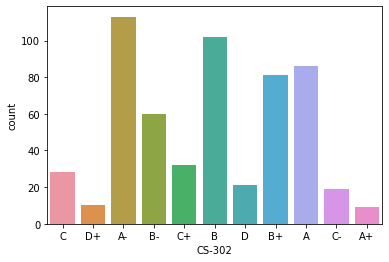

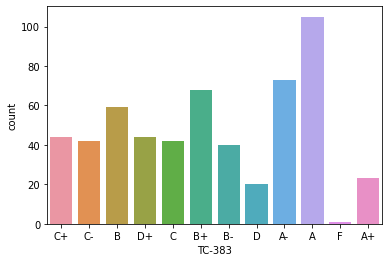

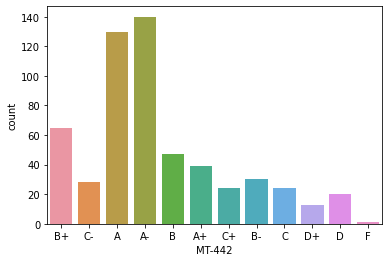

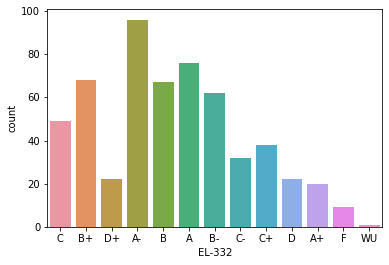

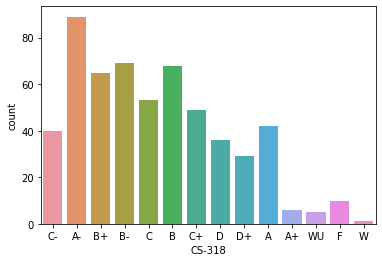

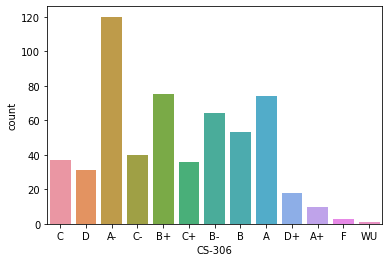

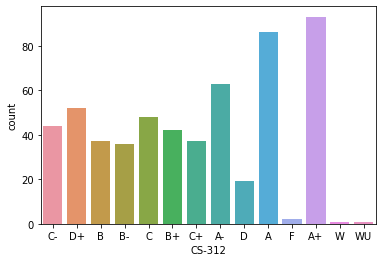

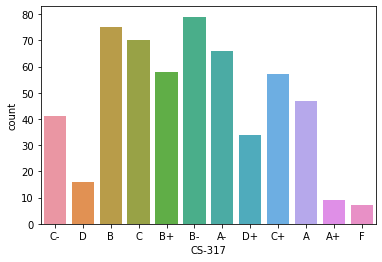

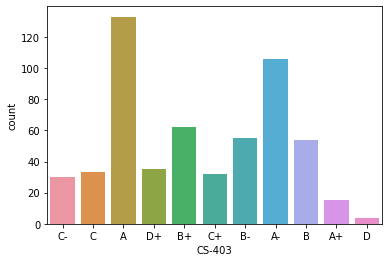

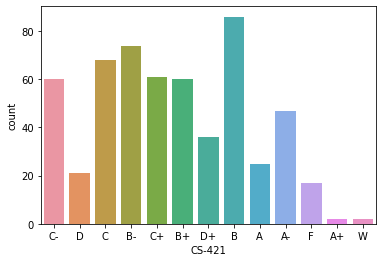

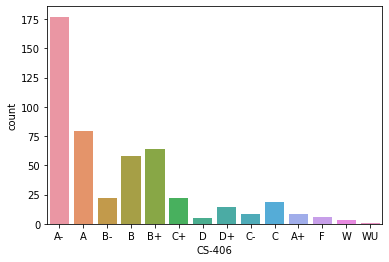

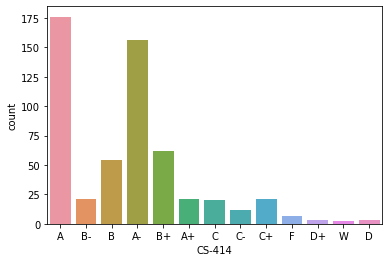

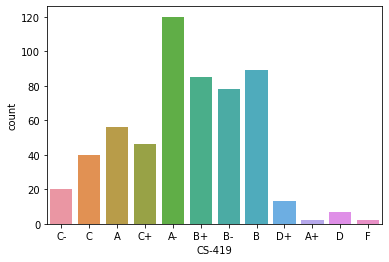

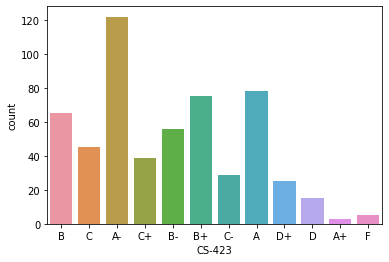

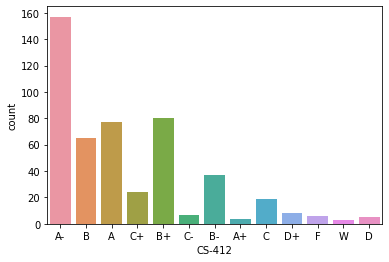

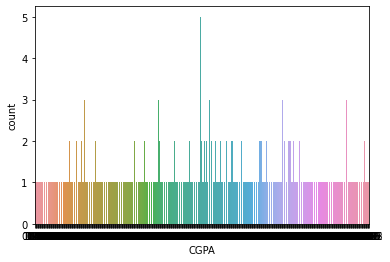

In [10]:
columns= df.columns
for i in columns:
    plt.figure()
    sns.countplot(x=df[i])
    #print(df[i].value_counts())
    #print('\n')

# Bivariate Analysis

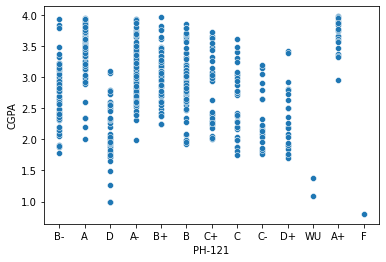

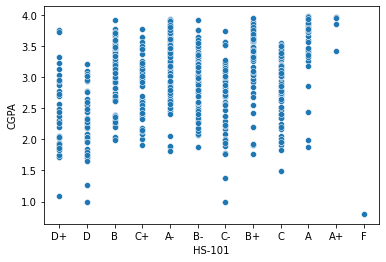

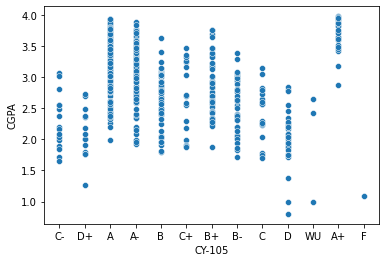

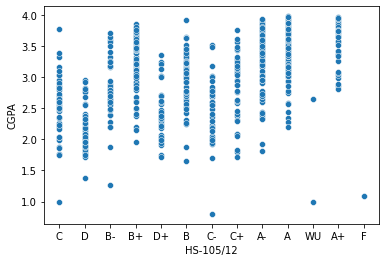

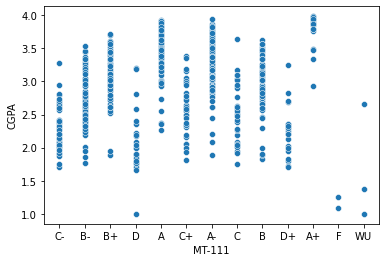

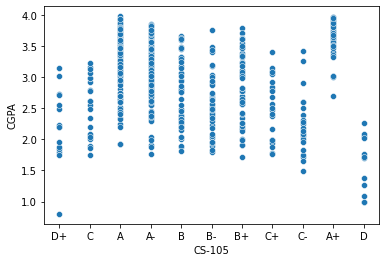

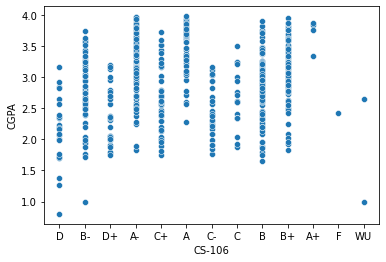

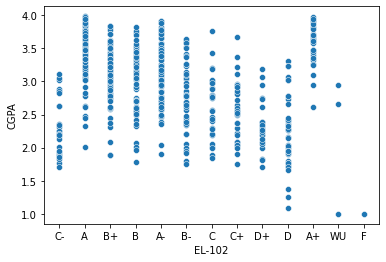

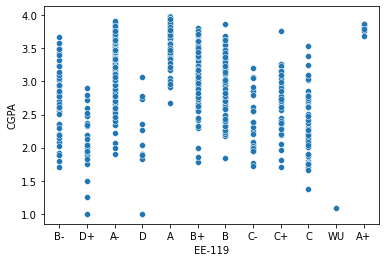

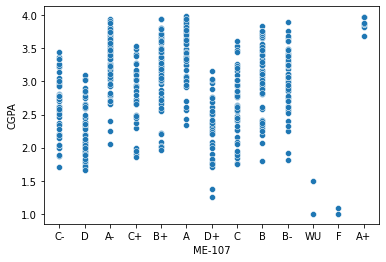

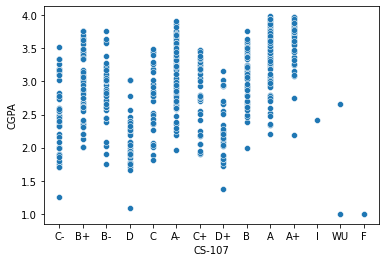

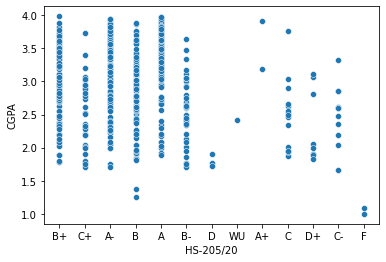

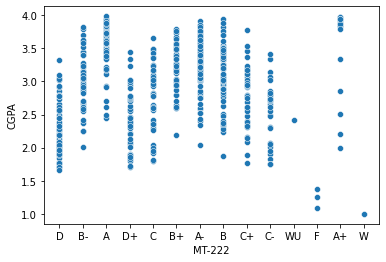

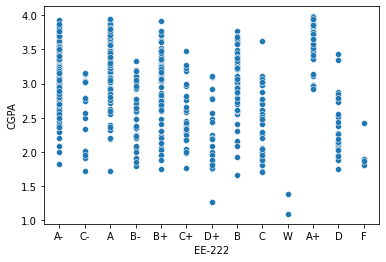

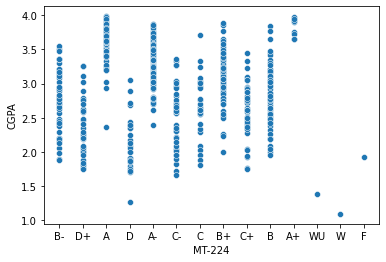

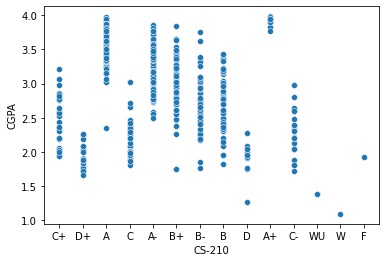

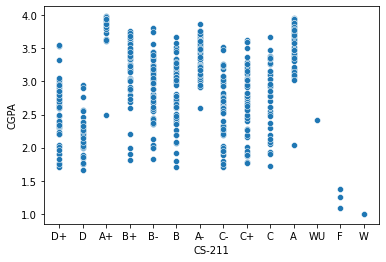

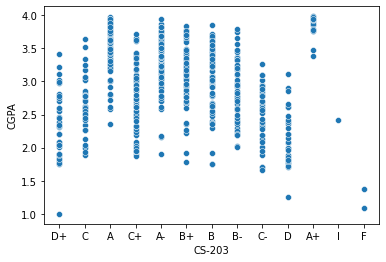

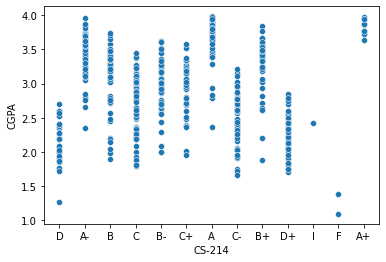

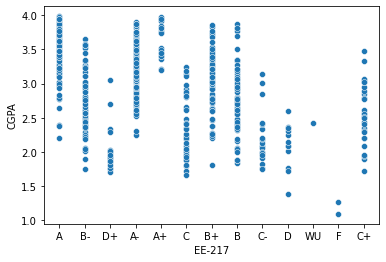

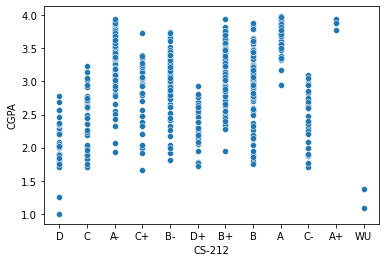

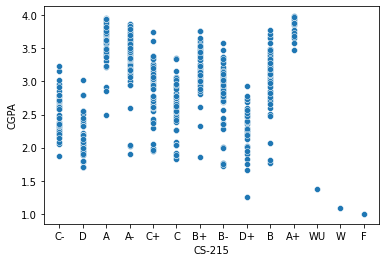

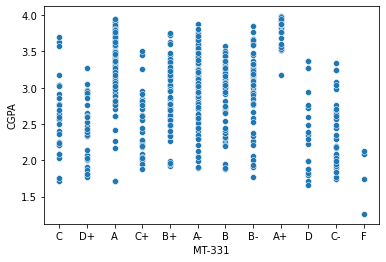

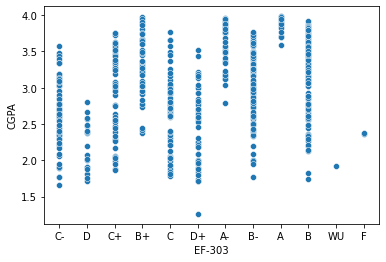

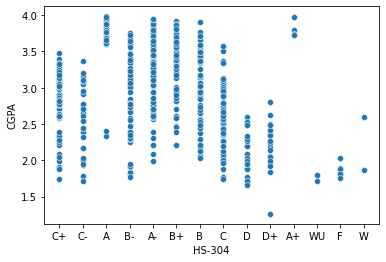

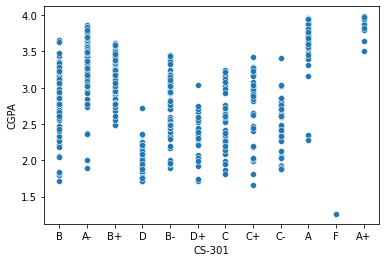

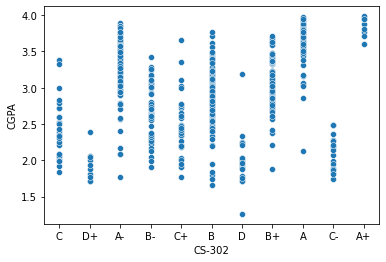

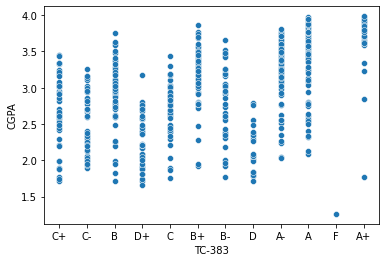

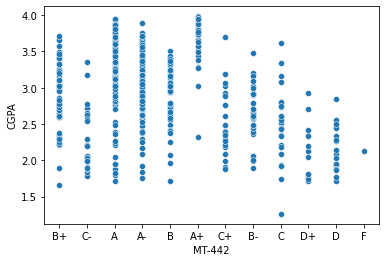

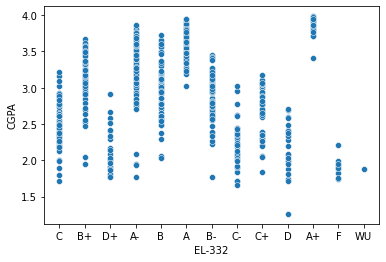

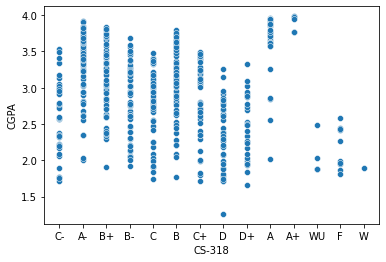

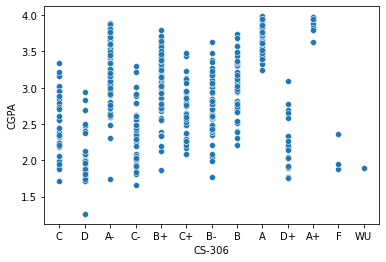

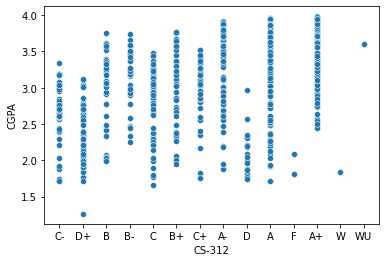

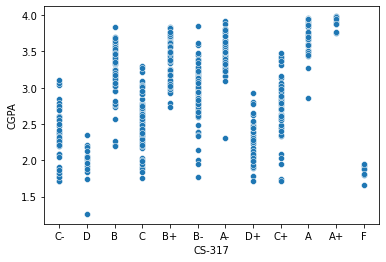

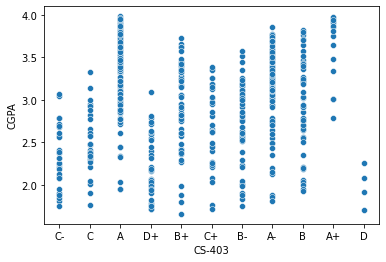

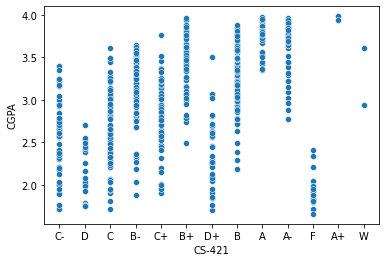

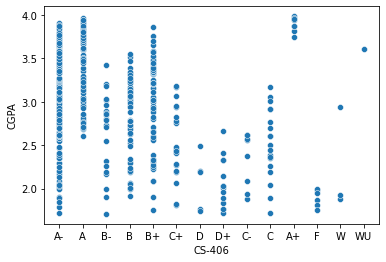

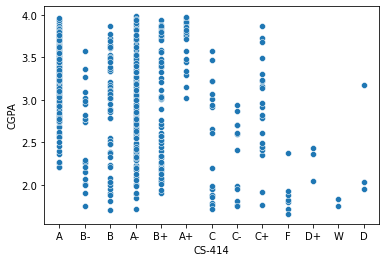

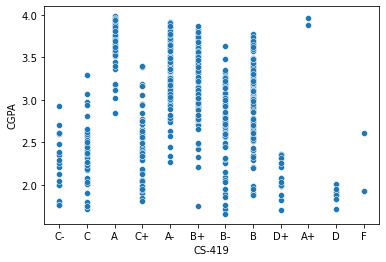

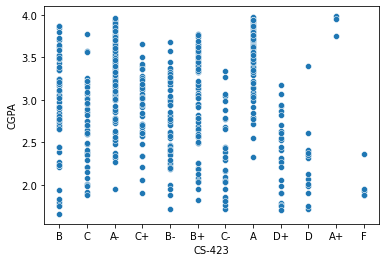

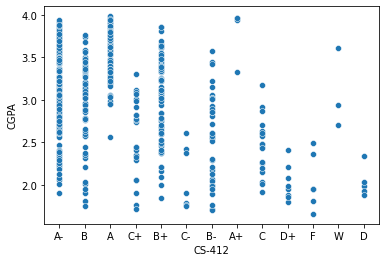

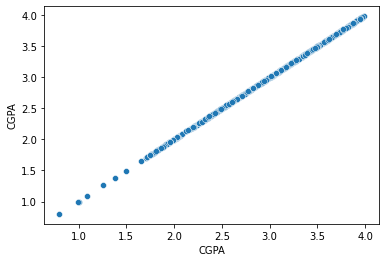

In [11]:
for m in columns:
    plt.figure()
    sns.scatterplot(x=df[m],y='CGPA',data=df)
    #print('\n')

# Multivariant Analysis

In [12]:
#sns.pairplot(df,hue='CGPA')
#plt.show()

# Encoding Catogorical columns through Label Encoder

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
Le= LabelEncoder()
for i in columns:
    if df[i].dtypes == 'object':
        df[i]=Le.fit_transform(df[i].values.reshape(-1,1))
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,2,2,0,0,0,4,4,3,0,3.798
567,1,0,0,0,0,0,0,2,0,0,...,4,4,0,0,2,3,2,6,2,3.772
568,3,0,2,4,0,0,0,0,0,3,...,2,3,0,4,0,6,4,2,2,3.470
569,0,4,9,0,9,10,5,8,5,8,...,9,3,3,8,9,6,3,5,6,2.193


now our data have been converted into string to int and ready for modeling

In [15]:
height = [5.9,5.9,5.6,5.9,5.5]
weight = [78,90,75,92,75]


In [16]:
dict_weight = {'Height' : height, 'Weight' : weight}
df_weight = pd.DataFrame(dict_weight)
df_weight

,Height,Weight
0,5.9,78
1,5.9,90
2,5.6,75
3,5.9,92
4,5.5,75


In [17]:
df_weight.corr()

,Height,Weight
Height,1.000000,0.753793
Weight,0.753793,1.000000


# Seperating Features And Target Variable

In [18]:
x=df.iloc[:,:-1]
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5,10,8,6,8,10,9,8,5,8,...,6,8,8,8,8,2,0,8,3,2
1,0,9,10,9,5,6,9,0,10,9,...,9,10,9,6,9,2,5,6,6,3
2,0,3,0,5,4,0,5,4,2,2,...,2,3,3,0,6,0,0,0,2,0
3,9,7,10,9,9,2,10,8,9,7,...,8,10,6,10,8,5,3,7,7,7
4,2,2,2,4,0,0,2,4,0,2,...,2,5,4,4,5,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,4,2,2,0,0,0,4,4,3,0
567,1,0,0,0,0,0,0,2,0,0,...,2,4,4,0,0,2,3,2,6,2
568,3,0,2,4,0,0,0,0,0,3,...,4,2,3,0,4,0,6,4,2,2
569,0,4,9,0,9,10,5,8,5,8,...,4,9,3,3,8,9,6,3,5,6


In [19]:
y=df.iloc[:,-1]
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [20]:
y.value_counts()

3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: CGPA, Length: 491, dtype: int64

# Feature Scaling Using MinMax Scaler

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
st= MinMaxScaler()
x= st.fit_transform(x)
x= pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.416667,0.909091,0.615385,0.461538,0.615385,1.0,0.692308,0.615385,0.416667,0.615385,...,0.461538,0.571429,0.666667,0.727273,0.615385,0.142857,0.000000,0.666667,0.250000,0.153846
1,0.000000,0.818182,0.769231,0.692308,0.384615,0.6,0.692308,0.000000,0.833333,0.692308,...,0.692308,0.714286,0.750000,0.545455,0.692308,0.142857,0.384615,0.500000,0.500000,0.230769
2,0.000000,0.272727,0.000000,0.384615,0.307692,0.0,0.384615,0.307692,0.166667,0.153846,...,0.153846,0.214286,0.250000,0.000000,0.461538,0.000000,0.000000,0.000000,0.166667,0.000000
3,0.750000,0.636364,0.769231,0.692308,0.692308,0.2,0.769231,0.615385,0.750000,0.538462,...,0.615385,0.714286,0.500000,0.909091,0.615385,0.357143,0.230769,0.583333,0.583333,0.538462
4,0.166667,0.181818,0.153846,0.307692,0.000000,0.0,0.153846,0.307692,0.000000,0.153846,...,0.153846,0.357143,0.333333,0.363636,0.384615,0.142857,0.000000,0.166667,0.166667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,0.250000,0.000000,0.000000,0.153846,0.076923,0.0,0.153846,0.153846,0.083333,0.307692,...,0.307692,0.142857,0.166667,0.000000,0.000000,0.000000,0.307692,0.333333,0.250000,0.000000
567,0.083333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.153846,0.000000,0.000000,...,0.153846,0.285714,0.333333,0.000000,0.000000,0.142857,0.230769,0.166667,0.500000,0.153846
568,0.250000,0.000000,0.153846,0.307692,0.000000,0.0,0.000000,0.000000,0.000000,0.230769,...,0.307692,0.142857,0.250000,0.000000,0.307692,0.000000,0.461538,0.333333,0.166667,0.153846
569,0.000000,0.363636,0.692308,0.000000,0.692308,1.0,0.384615,0.615385,0.416667,0.615385,...,0.307692,0.642857,0.250000,0.272727,0.615385,0.642857,0.461538,0.250000,0.416667,0.461538


Now our Data has been standard and in equal & refined form

# Now we go for data handling

# Finding the best random state for training the model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_val_score

In [24]:
maxAccu=0
maxRs=0
for i in range(1,300):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=.30, random_state= i)
    RFR= RandomForestRegressor()
    RFR.fit(x_train, y_train)
    pred= RFR.predict(x_test)
    acc= r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu= acc
        maxRs= i

print('Maximum r2_score is:',maxAccu,'on best random state is:',maxRs)

Maximum r2_score is: 0.9654463934670455 on best random state is: 75


In [25]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=.30, random_state= maxRs)

In [26]:
RFR= RandomForestRegressor()
Lr= LinearRegression()
ETR= ExtraTreesRegressor()
GNB= GradientBoostingRegressor()
DTR= DecisionTreeRegressor()
svm= SVR()
KNN= KNeighborsRegressor()
lasso= Lasso()
ridge= Ridge()

model= [RFR,Lr,ETR,GNB,DTR,svm,KNN,lasso,ridge]

for m in model:
    m.fit(x_train, y_train)
    pred=m.predict(x_test)
    pred_train=m.predict(x_train)
    print('The R2_score of:',m,'is')
    print("r2_score:",r2_score(y_test,pred))
    print('r2_score on training data:',r2_score(y_train,pred_train)*100)
    print('mean squared error is:',mean_squared_error(y_test,pred))
    print('mean absolute error is:',mean_absolute_error(y_test,pred))
    print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    print(m)
    score= cross_val_score(m,x,y)
    print(score)
    print(score.mean())
    print('Difference between r2_score and cross val score is:',r2_score(y_test,pred) - score.mean())
    print('\n')

The R2_score of: RandomForestRegressor() is
r2_score: 0.9648402131867189
r2_score on training data: 99.21123516010806
mean squared error is: 0.01334478244011624
mean absolute error is: 0.08730110465116274
root mean squared error: 0.11551961928657936


RandomForestRegressor()
[0.95892552 0.89336523 0.94805981 0.94533017 0.93545562]
0.9362272700366976
Difference between r2_score and cross val score is: 0.028612943150021275


The R2_score of: LinearRegression() is
r2_score: 0.9677246260089908
r2_score on training data: 94.15934923572368
mean squared error is: 0.012250012958574323
mean absolute error is: 0.08266169566706152
root mean squared error: 0.11067977664674936


LinearRegression()
[0.94090589 0.84721057 0.94921926 0.94277355 0.92969013]
0.9219598812392737
Difference between r2_score and cross val score is: 0.045764744769717036


The R2_score of: ExtraTreesRegressor() is
r2_score: 0.9733870941107147
r2_score on training data: 100.0
mean squared error is: 0.01010084165406972
mean abs

with all this machine learning algorithum SUPPORT VECTOR REGRESSOR as our best fitting and best performing model this gives 98% r2_score and .01% cross validation score  

# Hyper Parameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
parameters= {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.1, 1, 10, 100],
              'gamma': ['scale', 'auto', 0.1, 1, 10]}

In [29]:
GCV= GridSearchCV(SVR(),parameters)

In [30]:
GCV.fit(x_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [31]:
GCV.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [32]:
final=SVR(C=10, gamma= 0.1,kernel= 'rbf')
final.fit(x_train, y_train)
pred=final.predict(x_test)
acc= r2_score(y_test,pred)
print("R2_score:",r2_score(y_test,pred))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE",mean_squared_error(y_test,pred))
print("Root MSE",np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.9822573241950173
R2_score on training data: 94.12859242905436
MAE: 0.05673567757336298
MSE 0.006734174748567327
Root MSE 0.08206201769739352


After hyper parameter tuning my model get more accurated the accuracy is increase 97.96% to 98.22%

# Saving the model using .pkl

In [46]:
import pickle
pickle.dump(final,open('Student grade Analysis','wb'))

In [47]:
loaded_model= pickle.load(open('Student grade Analysis','rb'))
result=loaded_model.score(x_test, y_test)
print(result*100)

98.22573241950174


In [48]:

prediction = loaded_model.predict(x_test)
prediction

array([3.55578436, 2.66231155, 2.07910697, 3.41360254, 3.04909346,
       2.7451919 , 2.82491463, 2.08868296, 2.44934125, 3.83106882,
       2.26704684, 2.65460816, 2.5912556 , 2.83616735, 2.95399371,
       2.73298872, 2.9595764 , 3.30706866, 2.84719314, 3.62884391,
       3.09914883, 3.7039334 , 3.28503938, 2.8286599 , 2.93074951,
       3.23083375, 2.9489308 , 3.67440215, 2.55189096, 2.0833733 ,
       2.01252984, 3.61298478, 3.01599299, 2.76217176, 2.53446428,
       2.03358772, 2.32437016, 2.30934879, 3.06649687, 3.06389866,
       1.8489235 , 3.15680094, 2.76289416, 2.05197898, 2.92983327,
       2.69445305, 3.13945356, 3.79014871, 3.78943782, 3.38732836,
       3.5423985 , 2.18399902, 2.99376566, 3.28204898, 2.85309038,
       3.72189677, 2.89078953, 2.76694205, 3.16896014, 2.07349752,
       3.75331184, 2.95043169, 3.88180911, 3.32407462, 3.65125684,
       3.40183953, 2.97452429, 2.4648929 , 3.33589782, 2.86482736,
       3.55382806, 2.3843318 , 3.29018883, 3.75971179, 3.59151

In [49]:
a= np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['Orignal']= a
df

,predicted,Orignal
0,3.555784,3.572
1,2.662312,2.683
2,2.079107,2.042
3,3.413603,3.458
4,3.049093,3.058
...,...,...
167,3.406439,3.476
168,2.755664,2.793
169,2.057009,2.008
170,3.404102,3.346
